<a href="https://colab.research.google.com/github/PiyushAgrawal05/Human_face_sentiment_recognition/blob/main/Human_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d hasnainkhan0123/binary-image-classification

Dataset URL: https://www.kaggle.com/datasets/hasnainkhan0123/binary-image-classification
License(s): unknown
  0% 0.00/43.6M [00:00<?, ?B/s]
100% 43.6M/43.6M [00:00<00:00, 1.34GB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/binary-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
data_dir = 'Data'

In [7]:
import cv2
import imghdr

<ipython-input-7-290956b76b78>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
image_exts = ['png' , 'jpeg', 'jpg' , 'bmp']

In [9]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          print('Image not in ext list {}'.format(image_path))
          os.remove(image_path)
    except Exception as e:
        print('Issue with image {}'.format(image_path))
        os.remove(image_path)

Load Dataset

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 173 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()


In [13]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7aae734c8390>)

In [14]:
batch = data_iterator.next()

Preprocessing


In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [24]:
len(data)

6

In [76]:
train_size = 4
val_size = 1
test_size = 1

In [77]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [70]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [78]:
model = Sequential()

model.add(Conv2D(16,(3,3) , 1 , activation = 'relu' , input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3) , 1 , activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3) , 1 , activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.compile(optimizer='adam' , loss = tf.losses.BinaryCrossentropy() , metrics = ['accuracy'])

In [80]:
history = model.fit(train , epochs=20 , validation_data = val)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 680ms/step - accuracy: 0.5427 - loss: 2.0747 - val_accuracy: 0.4688 - val_loss: 1.1986
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 701ms/step - accuracy: 0.5417 - loss: 1.0022 - val_accuracy: 0.4062 - val_loss: 0.7438
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 858ms/step - accuracy: 0.6375 - loss: 0.6230 - val_accuracy: 0.5938 - val_loss: 0.6567
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5594 - loss: 0.6549 - val_accuracy: 0.5625 - val_loss: 0.6294
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5813 - loss: 0.6247 - val_accuracy: 0.5312 - val_loss: 0.6182
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 783ms/step - accuracy: 0.5833 - loss: 0.6137 - val_accuracy: 0.7500 - val_loss: 0.5083
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 837ms/step - accuracy: 0.6594 - loss: 0.5658 - val_accuracy: 0.7812 - val_loss: 0.5607
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8406 - loss: 0.5073 - val_accuracy: 0.5938 - val_loss: 0.6562
E

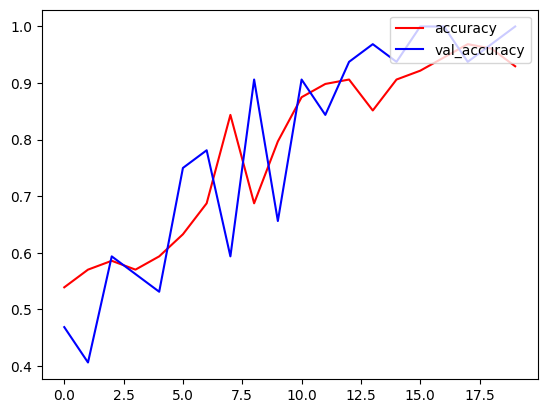

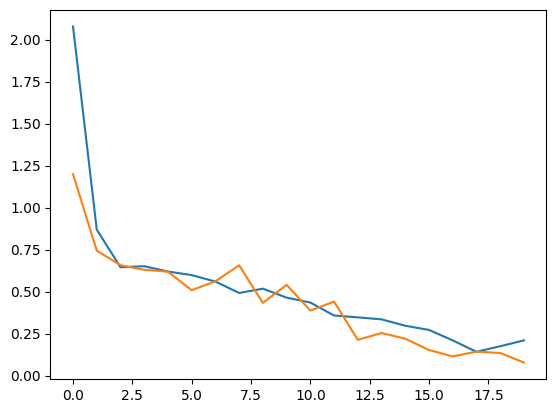

In [82]:
plt.plot(history.history['accuracy'] ,color= 'red' , label = 'accuracy')
plt.plot(history.history['val_accuracy'],  color = 'blue' , label=  'val_accuracy')
plt.legend(loc= 'upper right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [87]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [88]:
for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [94]:
print(f"Precision:{pre.result().numpy()} , Recall:{re.result().numpy()} , Binary_accuracy:{acc.result().numpy()}")

Precision:1.0 , Recall:1.0 , Binary_accuracy:1.0
